In [52]:
from drn_interactions.load import load_spikes, load_neurons, load_clusters
from scipy.stats import variation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from spiketimes.statistics import inter_spike_intervals, cv2

In [115]:
def get_session_neurons(df_neurons, session):
    return df_neurons[df_neurons["session_name"] == session]["neuron_id"].unique()

def subset_neurons(df, neurons):
    return df[df["neuron_id"].isin(neurons)]


def cv_isi(spiketrain, thresh=0.05):
    isi = inter_spike_intervals(spiketrain)
    isi = isi[isi > thresh]
    return cv2(isi)

def num_bursts(spiketrain, thresh=0.05):
    isi = inter_spike_intervals(spiketrain)
    burst_isis = isi[(isi < thresh)]
    return len(burst_isis)

def is_burster(spiketrain, frac_bursts=0.1, burst_thresh=0.05):
    n_tot = len(spiketrain)
    n_busts = num_bursts(spiketrain, thresh=burst_thresh)
    frac = n_busts / n_tot
    return frac >= frac_bursts 


def get_median_burst_interval(spiketrain, thresh=0.01):
    isi = inter_spike_intervals(spiketrain)
    burst_isis = isi[(isi < thresh)]
    return np.median(burst_isis)

In [53]:
df_spikes = load_spikes(block_name="pre")
neurons = load_neurons()
clusters = load_clusters()

In [74]:
t_start = 0
t_max = 600
bin_width = 0.1
session = neurons["session_name"].unique()[1]
print(session)
df = subset_neurons(df_spikes, neurons=get_session_neurons(neurons, session))

# df = df_spikes

ESHOCK_04_LOC1


<AxesSubplot:>

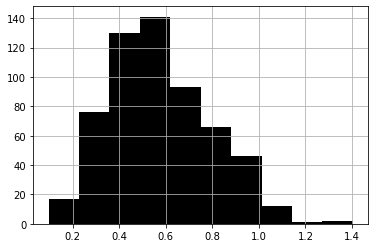

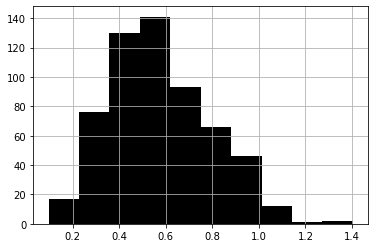

<Figure size 432x288 with 0 Axes>

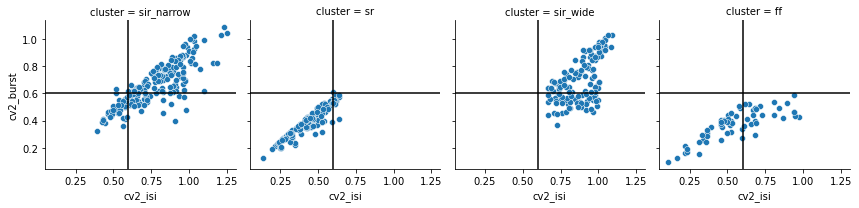

In [123]:
cv2_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(cv_isi, thresh=0.05)

cv2_burst.hist(color="black")

df = (
    neurons[["neuron_id", "mean_firing_rate", "session_name", "cv2_isi"]]
    .merge(cv2_burst.to_frame(name="cv2_burst").reset_index())
    .merge(clusters)
)
# df.head()

plt.figure()
a = sns.FacetGrid(data=df, col="cluster").map_dataframe(sns.scatterplot, x="cv2_isi", y="cv2_burst")
for ax in a.axes[0]:
    ax.axhline(0.6, color="black")
    ax.axvline(0.6, color="black")

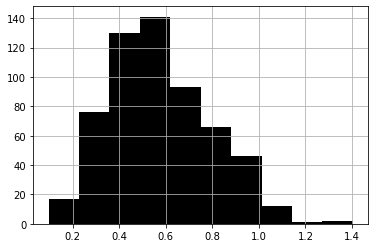

<Figure size 432x288 with 0 Axes>

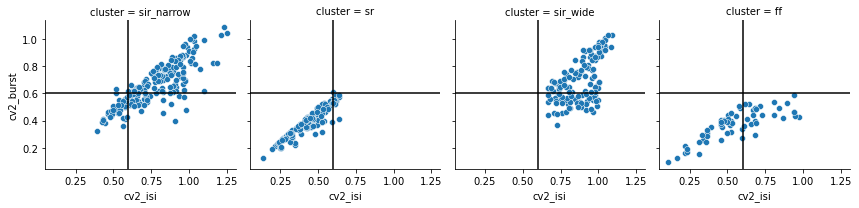

In [130]:
cv2_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(cv_isi, thresh=0.05)

cv2_burst.hist(color="black")

df = (
    neurons[["neuron_id", "mean_firing_rate", "session_name", "cv2_isi"]]
    .merge(cv2_burst.to_frame(name="cv2_burst").reset_index())
    .merge(clusters)
)
# df.head()

plt.figure()
a = sns.FacetGrid(data=df, col="cluster").map_dataframe(sns.scatterplot, x="cv2_isi", y="cv2_burst")
for ax in a.axes[0]:
    ax.axhline(0.6, color="black")
    ax.axvline(0.6, color="black")

<AxesSubplot:>

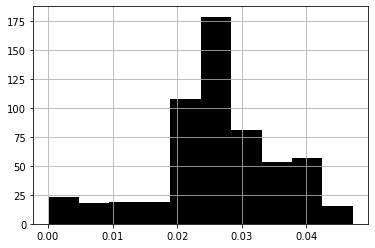

In [99]:
med_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(get_median_burst_interval, thresh=0.05)
med_burst.hist(color="black")

<AxesSubplot:>

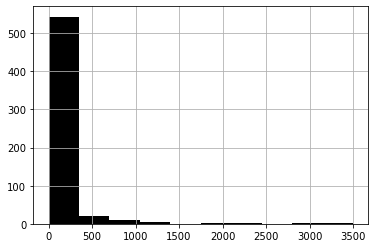

In [106]:
num_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(num_bursts, thresh=0.05)
num_burst.hist(color="black")

In [134]:
is_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(is_burster, burst_thresh=0.06, frac_bursts=0.3)
is_burst.mean()

0.22602739726027396

c:\Users\roryl\.conda\envs\drn-interactions\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


<AxesSubplot:xlabel='cluster', ylabel='median_burst'>

<Figure size 432x288 with 0 Axes>

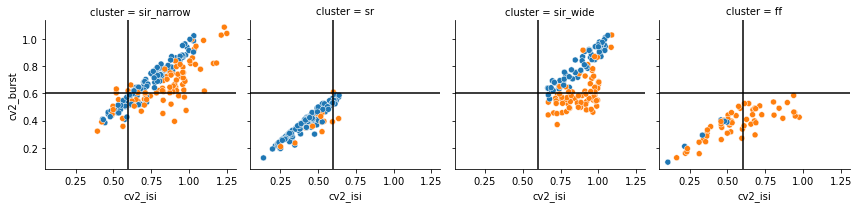

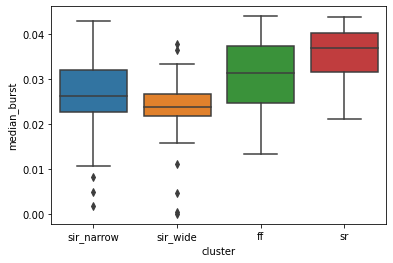

In [145]:
cv2_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(cv_isi, thresh=0.05)
is_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(is_burster, burst_thresh=0.05, frac_bursts=0.1)
med_burst = df_spikes.groupby("neuron_id")["spiketimes"].apply(get_median_burst_interval, thresh=0.05)



df = (
    neurons[["neuron_id", "mean_firing_rate", "session_name", "cv2_isi"]]
    .merge(cv2_burst.to_frame(name="cv2_burst").reset_index())
    .merge(is_burst.to_frame(name="is_burster").reset_index())
    .merge(med_burst.to_frame(name="median_burst").reset_index())
    .merge(clusters)
)

plt.figure()
a = sns.FacetGrid(data=df, col="cluster").map_dataframe(sns.scatterplot, x="cv2_isi", y="cv2_burst", hue="is_burster")
for ax in a.axes[0]:
    ax.axhline(0.6, color="black")
    ax.axvline(0.6, color="black")

plt.figure()
sns.boxplot(data=df.loc[lambda x: x.is_burster], x="cluster", y="median_burst")